<a href="https://colab.research.google.com/github/tejaswini-rapur/2311CS020566/blob/main/DB_Scan_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

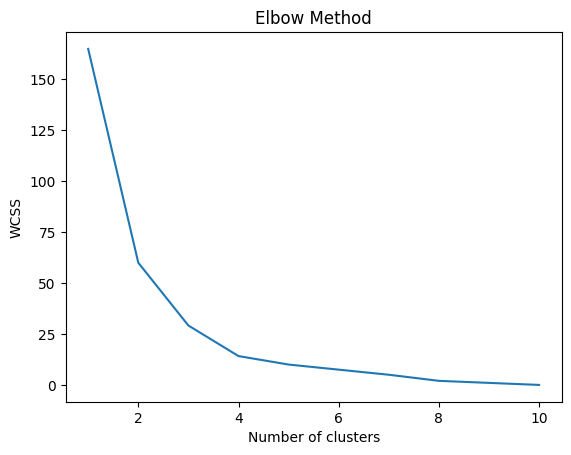

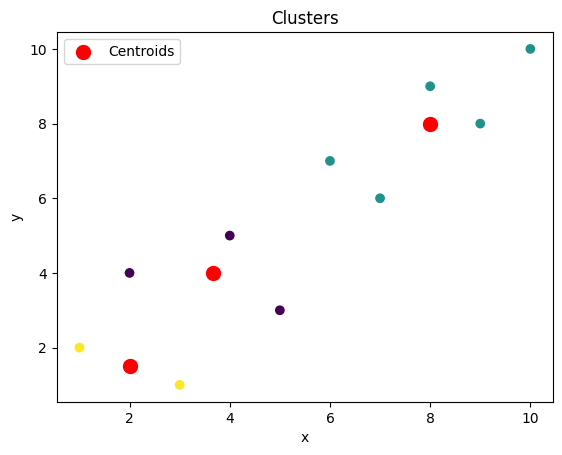

In [8]:
# prompt: clustering

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = {'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y': [2, 4, 1, 5, 3, 7, 6, 9, 8, 10]}
df = pd.DataFrame(data)

# Determine optimal number of clusters (Elbow method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans clustering with the chosen number of clusters (e.g., 3)
n_clusters = 3 # Replace with the optimal number of clusters from the elbow method
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(df)

# Visualize the clusters
plt.scatter(df['x'], df['y'], c=df['cluster'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [9]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# prompt: import a csv file(name:Wholesale customers data) from downloads

from google.colab import files
uploaded = files.upload()
import pandas as pd
import io

# Assuming the file is named 'Wholesale customers data.csv'
df = pd.read_csv(io.BytesIO(uploaded['Wholesale customers data.csv']))

# Now you can work with the DataFrame 'df'
print(df.head())


Saving Wholesale customers data.csv to Wholesale customers data.csv
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [12]:
import pandas as pd
file_path = '/content/Wholesale customers data.csv'
df = pd.read_csv(file_path)

In [13]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [14]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [15]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [16]:
array=df.values

In [17]:
array

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

In [18]:
from sklearn.preprocessing import StandardScaler
stsscaler=StandardScaler().fit(array)
X=stsscaler.transform(array)

In [19]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [20]:
dbscan=DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)